Random model regressor

In [22]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
gold_df= pd.read_csv('C:/Users/Usuario/Desktop/data/siddhardhan/files/gld_price_data.csv')
gold_df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [3]:
gold_df.shape

(2290, 6)

In [5]:
gold_df['Date'] = pd.to_datetime(gold_df['Date'])

In [6]:
gold_df['Date']

0      2008-01-02
1      2008-01-03
2      2008-01-04
3      2008-01-07
4      2008-01-08
          ...    
2285   2018-05-08
2286   2018-05-09
2287   2018-05-10
2288   2018-05-14
2289   2018-05-16
Name: Date, Length: 2290, dtype: datetime64[ns]

In [7]:
gold_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     2290 non-null   datetime64[ns]
 1   SPX      2290 non-null   float64       
 2   GLD      2290 non-null   float64       
 3   USO      2290 non-null   float64       
 4   SLV      2290 non-null   float64       
 5   EUR/USD  2290 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 107.5 KB


In [8]:
gold_df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
correlation = gold_df.corr()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_22540\1282729436.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_df.corr()


<Axes: >

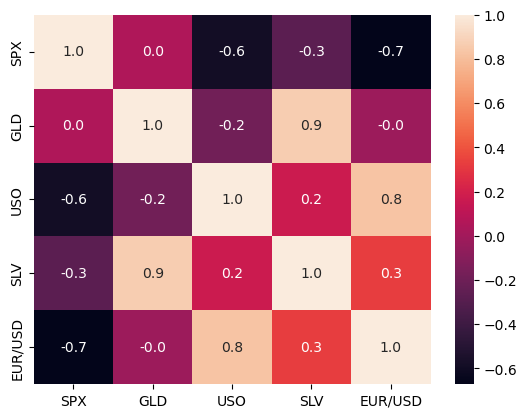

In [10]:
sns.heatmap(correlation, annot=True, fmt=".1f")

In [11]:
correlation['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

<Axes: xlabel='GLD', ylabel='Count'>

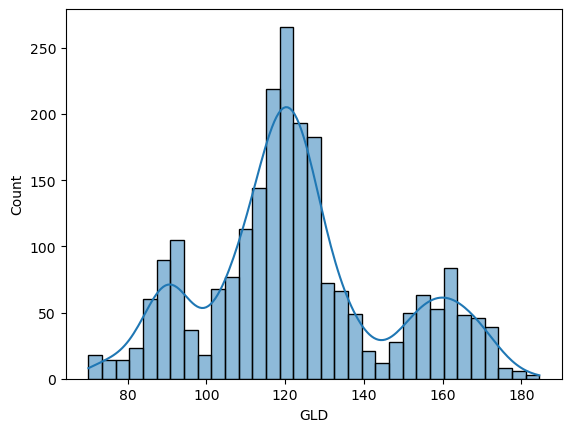

In [14]:
#sns.histplot(gold_df['GLD'])
#sns.kdeplot(gold_df['GLD'])

sns.histplot(gold_df['GLD'], kde=True)

In [15]:
gold_df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,2008-01-02,1447.160034,84.860001,78.470001,15.180,1.471692
1,2008-01-03,1447.160034,85.570000,78.370003,15.285,1.474491
2,2008-01-04,1411.630005,85.129997,77.309998,15.167,1.475492
3,2008-01-07,1416.180054,84.769997,75.500000,15.053,1.468299
4,2008-01-08,1390.189941,86.779999,76.059998,15.590,1.557099


In [16]:
X= gold_df.drop(['Date', 'GLD'], axis=1)
Y= gold_df['GLD']

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [18]:
#Random Forest
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(X_train, Y_train)

RandomForestRegressor()

In [19]:
#model evaluation
test_data_prediction = regressor.predict(X_test)

In [20]:
# r square
error_square= metrics.r2_score(Y_test, test_data_prediction)
error_square

0.9883347533973144

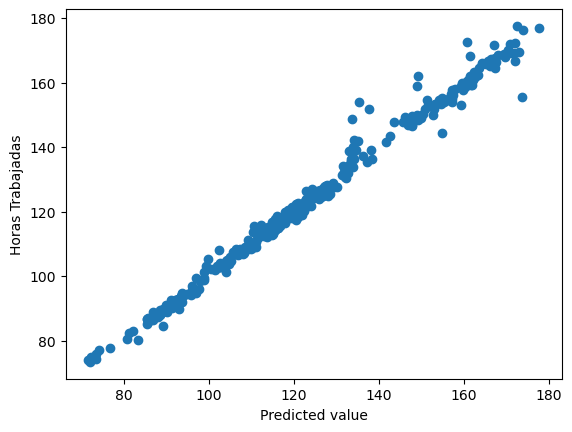

In [25]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel('Predicted value')
plt.ylabel("Horas Trabajadas")
plt.show()